In [ ]:
import fastai 
from fastai.vision.all import *
import numpy as np

In [ ]:
pip install fastai --upgrade 

     |████████████████████████████████| 186 kB 5.3 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
path = untar_data(URLs.PETS)/'images'

In [ ]:
def is_cat(x):
  return x[0].isupper()

In [ ]:
dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, seed = 42, label_func = is_cat, item_tfms = Resize(224))

In [ ]:
learn = cnn_learner(dls, resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.180186,0.019889,0.006089,01:06


epoch,train_loss,valid_loss,error_rate,time
0,0.051624,0.079758,0.018945,01:17
1,0.038014,0.024686,0.006766,01:17
2,0.012886,0.013456,0.004060,01:17


In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(path, bs = 8, fnames = get_image_files(path/"images"), 
                                              label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}', codes = np.loadtxt(path/'codes.txt', dtype = str))

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


In [ ]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,time
0,2.670584,2.297804,00:09


epoch,train_loss,valid_loss,time
0,1.825596,1.526983,00:03
1,1.561983,1.389075,00:03
2,1.404925,1.244864,00:03
3,1.325392,1.097425,00:03
4,1.214829,0.982503,00:03
5,1.102460,0.875419,00:03
6,1.004131,0.837685,00:03
7,0.927373,0.836990,00:03


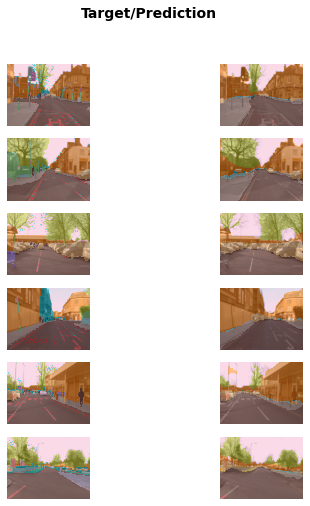

In [ ]:
learn.show_results(max_n = 6, figsize = (7,8))

In [ ]:
from fastai.text.all import *

In [ ]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid = 'test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult = 0.5, metrics = accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.466351,0.426737,0.805640,07:36


epoch,train_loss,valid_loss,accuracy,time
0,0.297893,0.258736,0.893560,14:50
1,0.243323,0.210499,0.914480,14:50
2,0.187287,0.192994,0.925960,14:54
3,0.146984,0.194723,0.929400,14:54


In [ ]:
learn.predict("The movie was very poor")

('neg', tensor(0), tensor([0.9768, 0.0232]))

In [ ]:
learn.predict("Excellent direction and so much comedy ")

('pos', tensor(1), tensor([6.4572e-04, 9.9935e-01]))

In [ ]:
from fastai.tabular.all import * 

In [ ]:
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path = path, y_names = "salary", cat_names = ['workclass', 'education', 'marital-status', 'occupation', 
                                                                                                   'relationship', 'race'], 
                                  cont_names = ['age', 'fnlwgt', 'education-num'], procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics = accuracy)

In [ ]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.384525,0.374127,0.824017,00:06
1,0.353764,0.351408,0.837377,00:06
2,0.366327,0.348126,0.840448,00:06


In [ ]:
from fastai.collab import * 

In [ ]:
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range = (0.5, 5.0))

learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.953054,1.803351,00:00


epoch,train_loss,valid_loss,time
0,1.796432,1.722305,00:00
1,1.649735,1.466639,00:00
2,1.280522,1.005831,00:00
3,0.927358,0.765805,00:00
4,0.752879,0.698721,00:00
5,0.690931,0.676980,00:00
6,0.651252,0.669749,00:00
7,0.640231,0.665943,00:00
8,0.637225,0.664606,00:00
9,0.639657,0.664524,00:00


In [ ]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,87.0,1.0,4.0,4.073025
1,46.0,32.0,2.5,2.712826
2,27.0,28.0,2.5,3.161063
3,90.0,93.0,5.0,4.345182
4,29.0,69.0,4.0,4.092639
5,63.0,95.0,0.5,2.916654
6,57.0,61.0,3.5,3.820521
7,34.0,42.0,5.0,3.653143
8,43.0,41.0,5.0,3.766346


In [ ]:
!pip install -q jmd_imagescraper

In [ ]:
from jmd_imagescraper.core import *
from pathlib import Path

In [ ]:
path = Path().cwd()/"test_images"

In [ ]:
if path.exists():
  import shutil
  shutil.rmtree(path)

In [ ]:
n_images = 100
search_terms = ["gucci shoes", "nike air jordan", "balenciaga shoes", "adidas yeezy"]

In [ ]:
for term in search_terms :
  duckduckgo_search(path, '_'.join(term.split()), term, max_results=n_images)

Duckduckgo search: gucci shoes


Duckduckgo search: nike air jordan


Duckduckgo search: balenciaga shoes


Duckduckgo search: adidas yeezy


In [ ]:
shoes = DataBlock(blocks = (ImageBlock, CategoryBlock), get_items = get_image_files, 
                  splitter = RandomSplitter(valid_pct = 0.2, seed = 42), 
                  get_y = parent_label, item_tfms = Resize(128))

In [ ]:
dls = shoes.dataloaders(path)

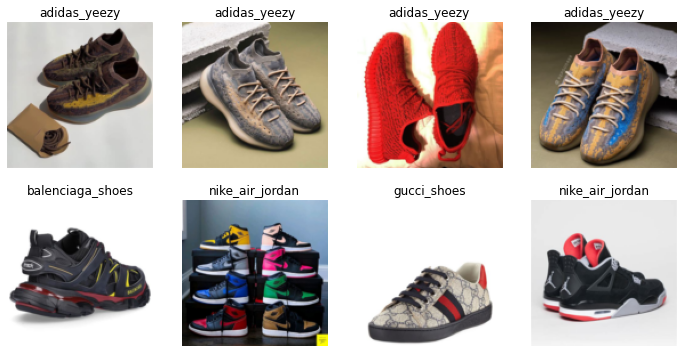

In [ ]:
dls.valid.show_batch(max_n = 8, nrows = 2)

In [ ]:
shoes = shoes.new(item_tfms = Resize(128), batch_tfms = aug_transforms(mult = 2))
dls = shoes.dataloaders(path)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


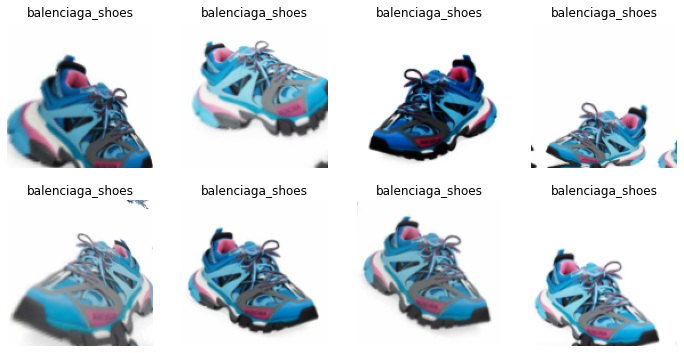

In [ ]:
dls.train.show_batch(max_n = 8, nrows = 2, unique = True)

In [ ]:
shoes = shoes.new(item_tfms = RandomResizedCrop(224, min_scale=0.5),
                  batch_tfms = aug_transforms())
dls = shoes.dataloaders(path)

In [ ]:
learner = cnn_learner(dls, resnet18, metrics = error_rate)
learner.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,2.187111,2.138735,0.650000,00:05


epoch,train_loss,valid_loss,error_rate,time
0,1.221734,1.225827,0.462500,00:04
1,1.089777,0.774703,0.300000,00:04
2,0.845707,0.570184,0.262500,00:04
3,0.695678,0.514605,0.237500,00:04


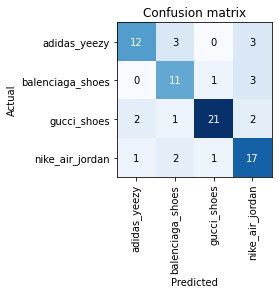

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

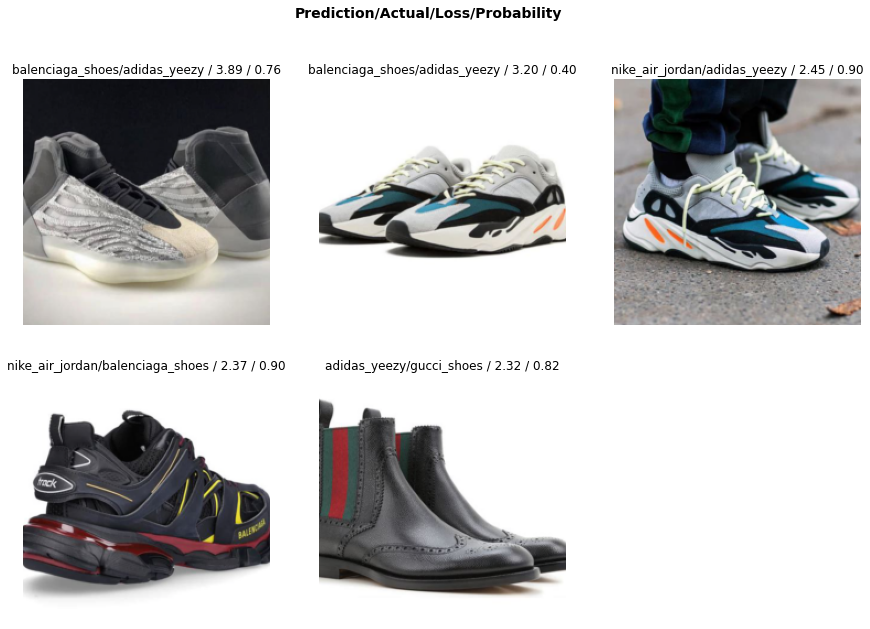

In [ ]:
interp.plot_top_losses(5, nrows = 2, figsize = (15,10))

In [ ]:
learner.export()

In [ ]:
path = Path()

In [ ]:
path.ls(file_exts = ".pkl")

(#1) [Path('export.pkl')]

In [ ]:
learn_inf = load_learner(path/"export.pkl")

In [ ]:
learn_inf.predict("/content/test_images/adidas_superstars/001_c4e16087.jpg")

('adidas_superstars',
 tensor(0),
 tensor([9.7119e-01, 7.3798e-03, 2.1023e-02, 4.0233e-04]))

In [ ]:
learn_inf.predict("/content/nike.jpg")

('nike_air_jordan',
 tensor(3),
 tensor([3.5452e-03, 4.1235e-03, 5.8519e-05, 9.9227e-01]))

In [ ]:
learn_inf.dls.vocab

['adidas_superstars', 'adidas_yeezy', 'converse_all_star', 'nike_air_jordan']

In [ ]:
import ipywidgets as widgets

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl : display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred, pred_idx, probs = learn_inf.predict(img)

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction : {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction : nike_air_jordan; Probability: 0.9603')

In [ ]:
btn_run = widgets.Button(description = "Classify")
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl : display(img.to_thumb(128,128))
  pred, pred_idx, probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction : {pred}; Probability: {probs[pred_idx]:.04f}'

In [ ]:
btn_run.on_click(on_click_classify)

In [ ]:
from ipywidgets import *

In [ ]:
VBox([widgets.Label("Select your shoes !"), btn_upload, btn_run, out_pl, lbl_pred])